In [2]:
import os
import math
import pandas as pd
from IPython.display import clear_output

In [3]:
#input: centre coordinate of the source from the catalogue
#output: 
#    ans1: boundary of x-axis
#    ans2: boundary of y-axis
#'48' decide the size of the stamp
def get_coor(x,y):
    ans1 = []
    ans2 = []
    ans1.append(math.ceil(x-48))
    ans1.append(math.ceil(x+48))
    ans2.append(math.ceil(y-48))
    ans2.append(math.ceil(y+48))
    return ans1,ans2

In [4]:
#the csv file is the catalogue, 
#in the cataloge, the coordinate of source is stored at column 'x_position,y_position'
#the name of FITS image is stored at column 'img_name'
data_df = pd.read_csv("demo_catalogue.csv")

#the dir contains FITS image
img_dir = "/home/zzh/demo_fits_image/"

#the dir you want  save the stamps
save_dir = "/home/zzh/demo_stamp/"

In [5]:
#in the cataloge, the coordinate of source is stored at column 'x_position,y_position'
img_name_list = data_df.img_name.tolist()
x_position_list = data_df.x_position.tolist()
y_position_list = data_df.y_position.tolist()
name_list = data_df.name.tolist()

In [6]:
img_full_name_list = []
for img_name in img_name_list: 
#    uncommont the line if you want to deal with the image except for r-band, e.g., i-band.
#    img_name = img_name.replace("_r_","_i_")
    img_full_name_list.append(img_dir + img_name)


In [7]:
i = 0
for this_fits in img_full_name_list:
        this_xcentre = x_position_list[i]
        this_ycentre = y_position_list[i]
        xcoor,ycoor = get_coor(this_xcentre, this_ycentre)
        xcoor_low = xcoor[0]
        xcoor_up  = xcoor[1]
        ycoor_low = ycoor[0]
        ycoor_up  = ycoor[1]
        this_name =  name_list[i].split(" ")[-1]
        
        cmd = "imcopy" + " " + this_fits + "[" + str(xcoor_low) + ":" + str(xcoor_up) + ',' + str(ycoor_low) + ":" + str(ycoor_up) + "]" + " " +save_dir+this_name+".fits"
        os.system(cmd)
        clear_output(wait=True)
        i = i + 1
        print("%d th have been processed, tot: %d"%(i,len(name_list)))

1 th have been processed, tot: 1


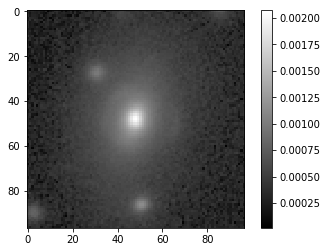

In [22]:
#show example
from astropy.io import fits
import matplotlib.pyplot as plt
hud = fits.open('/home/zzh/demo_stamp/J221339.02-331156.34.fits')
img = hud[0].data
img_scaled = [abs(intensity)**0.3 for intensity in img]
plt.imshow(img_scaled, cmap='gray')
plt.colorbar()
plt.show()